In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
df=pd.read_csv('Apple_data.csv')
df.head()


,date,open,high,low,close,volume
0,03-01-2022,177.830002,182.880005,177.710007,182.009995,104487900
1,04-01-2022,182.630005,182.940002,179.119995,179.699997,99310400
2,05-01-2022,179.610001,180.169998,174.639999,174.919998,94537600
3,06-01-2022,172.699997,175.300003,171.639999,172.000000,96904000
4,07-01-2022,172.889999,174.139999,171.029999,172.169998,86709100


In [4]:
df.shape


(501, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    501 non-null    object 
 1   open    501 non-null    float64
 2   high    501 non-null    float64
 3   low     501 non-null    float64
 4   close   501 non-null    float64
 5   volume  501 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 23.6+ KB


In [6]:
df.describe()

,open,high,low,close,volume
count,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,163.512276,165.365749,161.818343,163.674351,7.359234e+07
std,17.739105,17.436476,17.967710,17.703835,2.536511e+07
min,126.010002,127.769997,124.169998,125.019997,2.404830e+07
25%,148.869995,150.919998,147.240005,149.350006,5.414710e+07
50%,164.589996,166.330002,162.949997,165.020004,6.924600e+07
75%,176.479996,177.990005,174.820007,176.279999,8.670910e+07
max,198.020004,199.619995,197.000000,198.110001,1.826020e+08


In [7]:
print(df.dtypes)


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object


In [8]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')


In [9]:
print(df.dtypes)


date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object


In [10]:
print(df.corr())


            date      open      high       low     close    volume
date    1.000000  0.507597  0.499348  0.521428  0.512073 -0.589315
open    0.507597  1.000000  0.996629  0.996469  0.990730 -0.417732
high    0.499348  0.996629  1.000000  0.996583  0.996005 -0.394300
low     0.521428  0.996469  0.996583  1.000000  0.996486 -0.444855
close   0.512073  0.990730  0.996005  0.996486  1.000000 -0.419596
volume -0.589315 -0.417732 -0.394300 -0.444855 -0.419596  1.000000


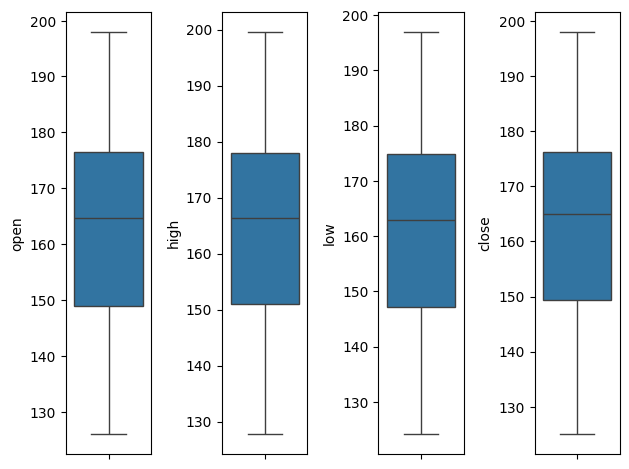

In [11]:
f, axes = plt.subplots (1,4)
sns. boxplot( y= 'open', data=df, ax=axes[0])
sns. boxplot( y='high', data=df, ax=axes[1])
sns. boxplot ( y='low', data=df, ax=axes [2])
sns. boxplot ( y='close', data=df, ax=axes [3])
plt. tight_layout ()

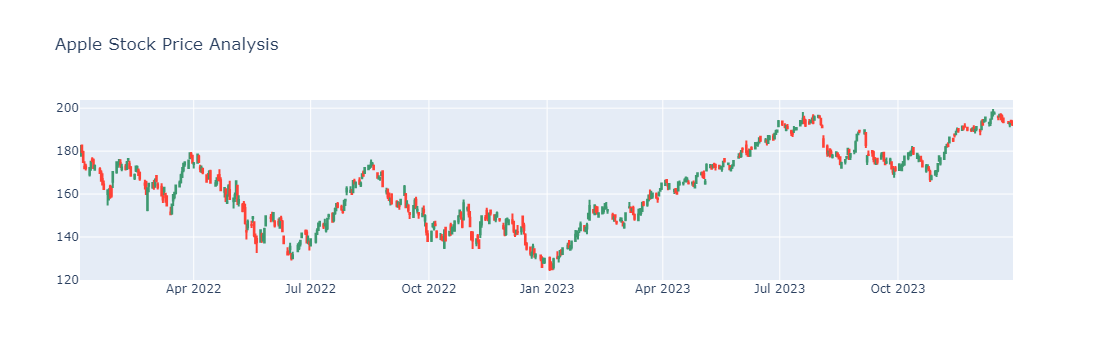

In [14]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=df["date"],open=df["open"],high=df["high"],low=df["low"],close=df["close"])])
figure.update_layout(title = "Apple Stock Price Analysis",xaxis_rangeslider_visible=False)
figure.show()


In [15]:
X = df[['open','high','low','volume']].values
y = df[['close']].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print( 'Train:', X_train.shape)
print( 'Test:', X_test.shape)

Train: (400, 4)
Test: (101, 4)


In [17]:
from sklearn. linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score 
import statsmodels.api as sm
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [18]:
predicted = regressor.predict(X_test)
predicted.shape

(101, 1)

In [19]:
dframe = pd.DataFrame({'Actual_Price': y_test.flatten(), 'Predicted_Price': predicted.flatten()})
print(dframe)

     Actual_Price  Predicted_Price
0      142.559998       142.399020
1      129.619995       128.636295
2      148.479996       149.623754
3      180.710007       181.090947
4      173.559998       172.981792
..            ...              ...
96     174.070007       173.011732
97     174.910004       174.237739
98     177.770004       178.007185
99     153.339996       153.248800
100    148.710007       148.000155

[101 rows x 2 columns]


In [20]:
dframe.describe()

,Actual_Price,Predicted_Price
count,101.000000,101.000000
mean,163.382871,163.296880
std,16.347622,16.472389
min,129.619995,128.636295
25%,150.039993,149.623754
50%,163.759995,163.358896
75%,175.740005,175.492610
max,198.110001,197.767455


In [21]:
x2 = abs(predicted - y_test)
y2 = 100 *(x2 / y_test)
accuracy = 100 -np.mean(y2)
print('Accuracy:',round(accuracy,2), '%')

Accuracy: 99.56 %


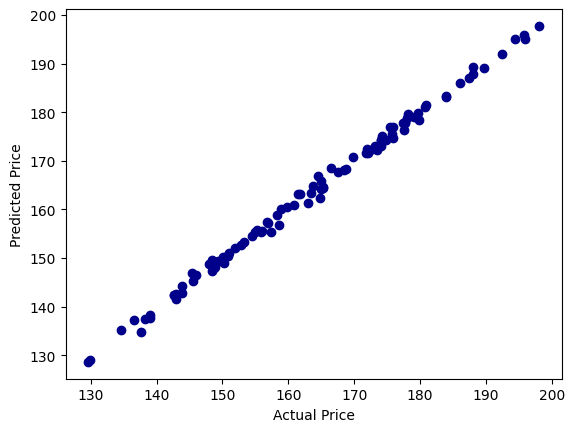

In [22]:
plt.scatter(dframe.Actual_Price,dframe.Predicted_Price,color='DarkBlue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

<Axes: >

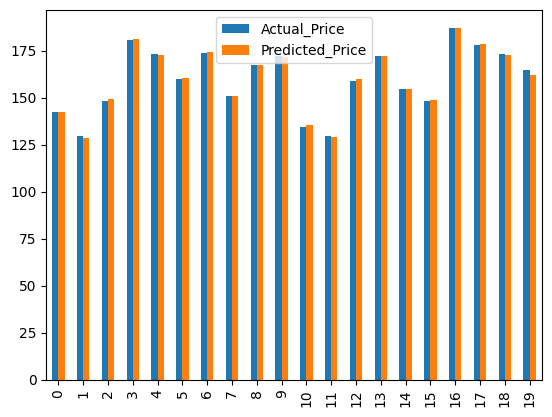

In [23]:
graph = dframe.head(20)
graph.plot(kind='bar')